In [4]:

import keras
keras.__version__

'2.2.4'

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 302s 26us/step


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

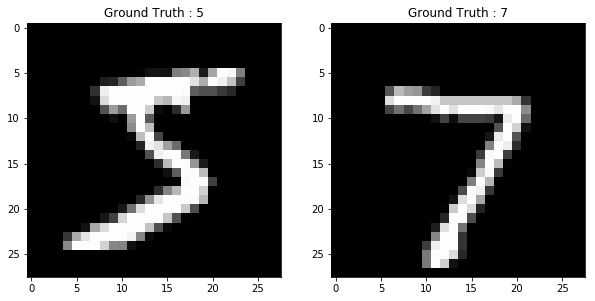

In [16]:
from keras.utils import to_categorical
import numpy  
import matplotlib.pyplot as plt
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [19]:
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.2711 - acc: 0.9159 - val_loss: 0.1479 - val_acc: 0.9535
Epoch 2/20
60000/60000 [==============================] - 20s 335us/step - loss: 0.0913 - acc: 0.9716 - val_loss: 0.0827 - val_acc: 0.9730
Epoch 3/20
60000/60000 [==============================] - 20s 331us/step - loss: 0.0596 - acc: 0.9813 - val_loss: 0.0793 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.0390 - acc: 0.9876 - val_loss: 0.0689 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.0295 - acc: 0.9903 - val_loss: 0.0687 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0757 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.0166 - acc: 0.9943 - val_loss: 0.

In [23]:
 [test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 2s 232us/step
Evaluation result on Test Data : Loss = 0.11544989031041328, accuracy = 0.9839


Text(0.5, 1.0, 'Accuracy Curves')

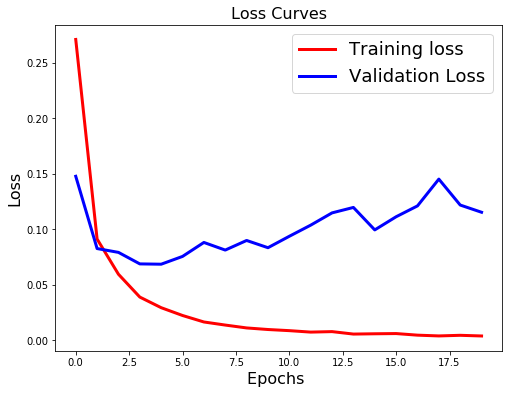

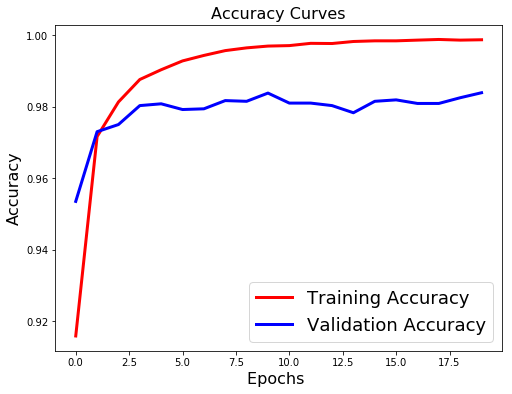

In [24]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [25]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 402us/step - loss: 0.3754 - acc: 0.8831 - val_loss: 0.1582 - val_acc: 0.9511
Epoch 2/20
60000/60000 [==============================] - 24s 402us/step - loss: 0.1694 - acc: 0.9493 - val_loss: 0.0973 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 24s 401us/step - loss: 0.1293 - acc: 0.9610 - val_loss: 0.0864 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.1095 - acc: 0.9671 - val_loss: 0.0900 - val_acc: 0.9744
Epoch 5/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.0952 - acc: 0.9717 - val_loss: 0.0755 - val_acc: 0.97910949 
Epoch 6/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.0902 - acc: 0.9739 - val_loss: 0.0790 - val_acc: 0.9778
Epoch 7/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.0831 - acc: 0.9753 - val_los

Text(0.5, 1.0, 'Accuracy Curves')

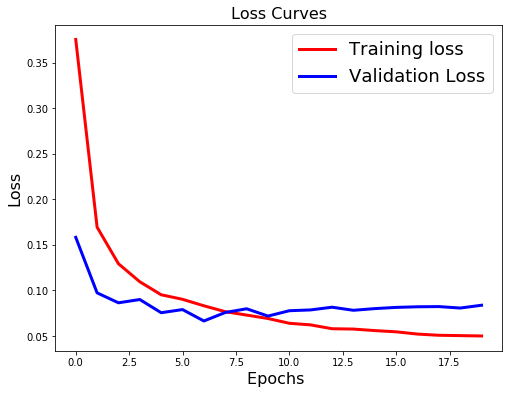

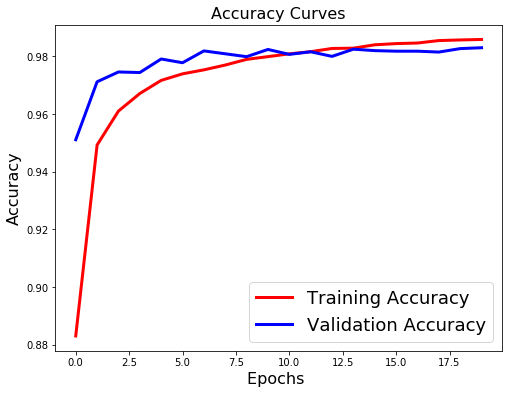

In [26]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [27]:
# Predict the most likely class
model_reg.predict_classes(test_data[[0],:])

array([7], dtype=int64)

In [28]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[9.9058723e-25, 1.4420104e-17, 3.1636090e-13, 1.2543146e-15,
        5.1981126e-24, 2.2666684e-20, 4.1981162e-36, 1.0000000e+00,
        1.1826130e-19, 1.9486738e-14]], dtype=float32)